# Heart Disease Analysis and Prediction

## Kalp Hastalığı Analizi ve Tahmini

### Goal, Limits and Dataset Content

**Goal**

The goal of this notebook is to analyze the heart disease data obtained from [UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease), and show which features have the most affect in the occurrence of heart disease.

**Limits**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

**Content**

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Importing Packages

We need some packages to read the data which is given as csv file, to visualize and to operate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Overview

In [2]:
heart = pd.read_csv("heart.csv")
data = heart.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe().T.style.background_gradient(subset = ['count'], cmap = 'viridis') \
    .bar(subset = ['mean', '50%']) \
    .bar(subset = ['std'])

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exang,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


Now I'm creating subsets to make easier to visualize.

In [5]:
for col in data.columns:
    print("------------------------------------")
    print("{}\n{}".format(col,data[col].value_counts()))
    print("Unique value counts: ",len(data[col].unique()))

------------------------------------
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
Unique value counts:  41
------------------------------------
sex
1    207
0     96
Name: sex, dtype: int64
Unique value counts:  2
------------------------------------
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
Unique value counts:  4
------------------------------------
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126  

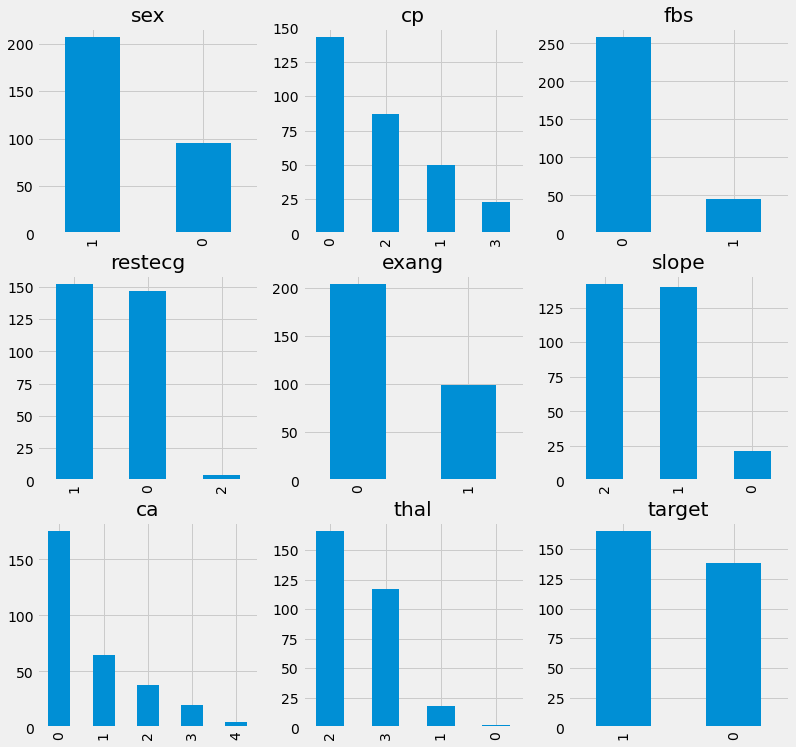

In [6]:
fig = plt.figure(figsize=(12,12))
i = 1
for col in data.columns:
    if len(data[col].unique()) <= 5:
        plt.subplot(3,3,i)
        data[col].value_counts().plot.bar()
        plt.title(col)
        i = i+1
plt.show()

### Features and target

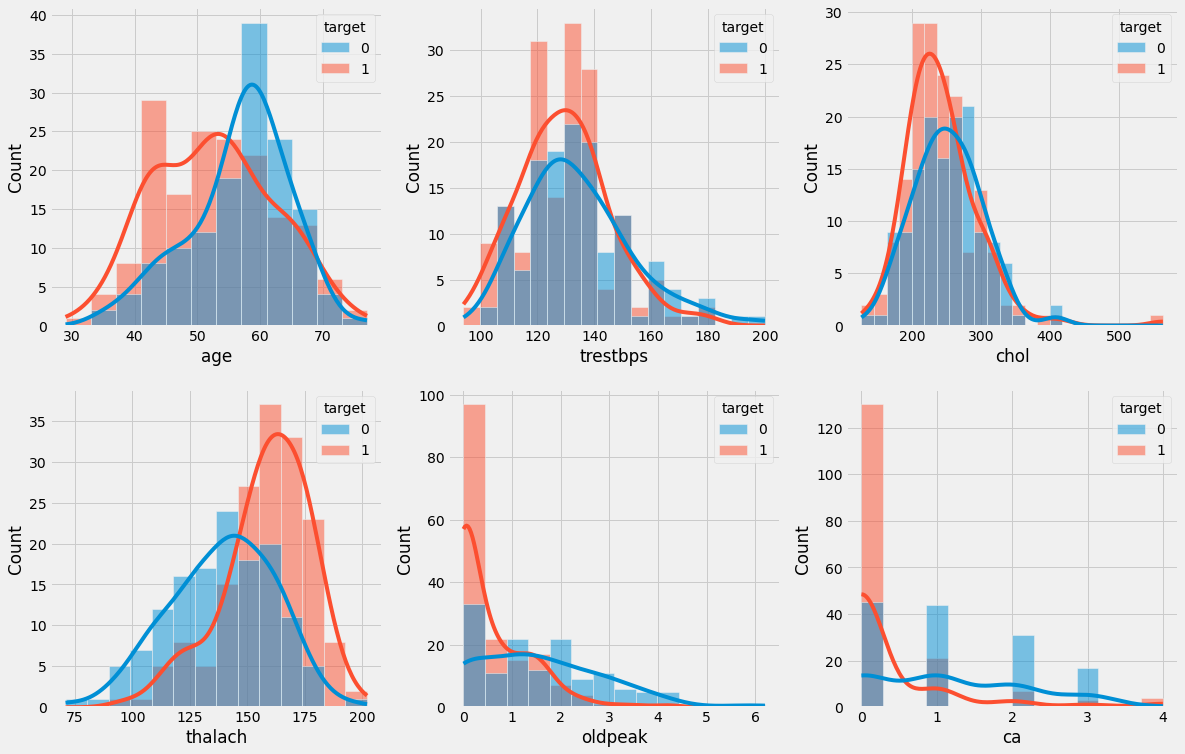

In [7]:
cols = []

for col in data.columns:
    if len(data[col].unique()) >= 5:
        cols.append(col)
        
        
fig = plt.figure(figsize=(18,12))
i = 1
for col in cols:
        plt.subplot(2,3,i)
        sns.histplot(data=data, x=col, hue="target", kde=True)
        i = i+1
plt.show()

### Features, features, target

Using seaborn's pairplot, not only being able to plot feature/target relations, it's possible to plot all feature relations with each others at once. It's huge but useful. I will use only columns having more than 4 unique values that I created as a list before.

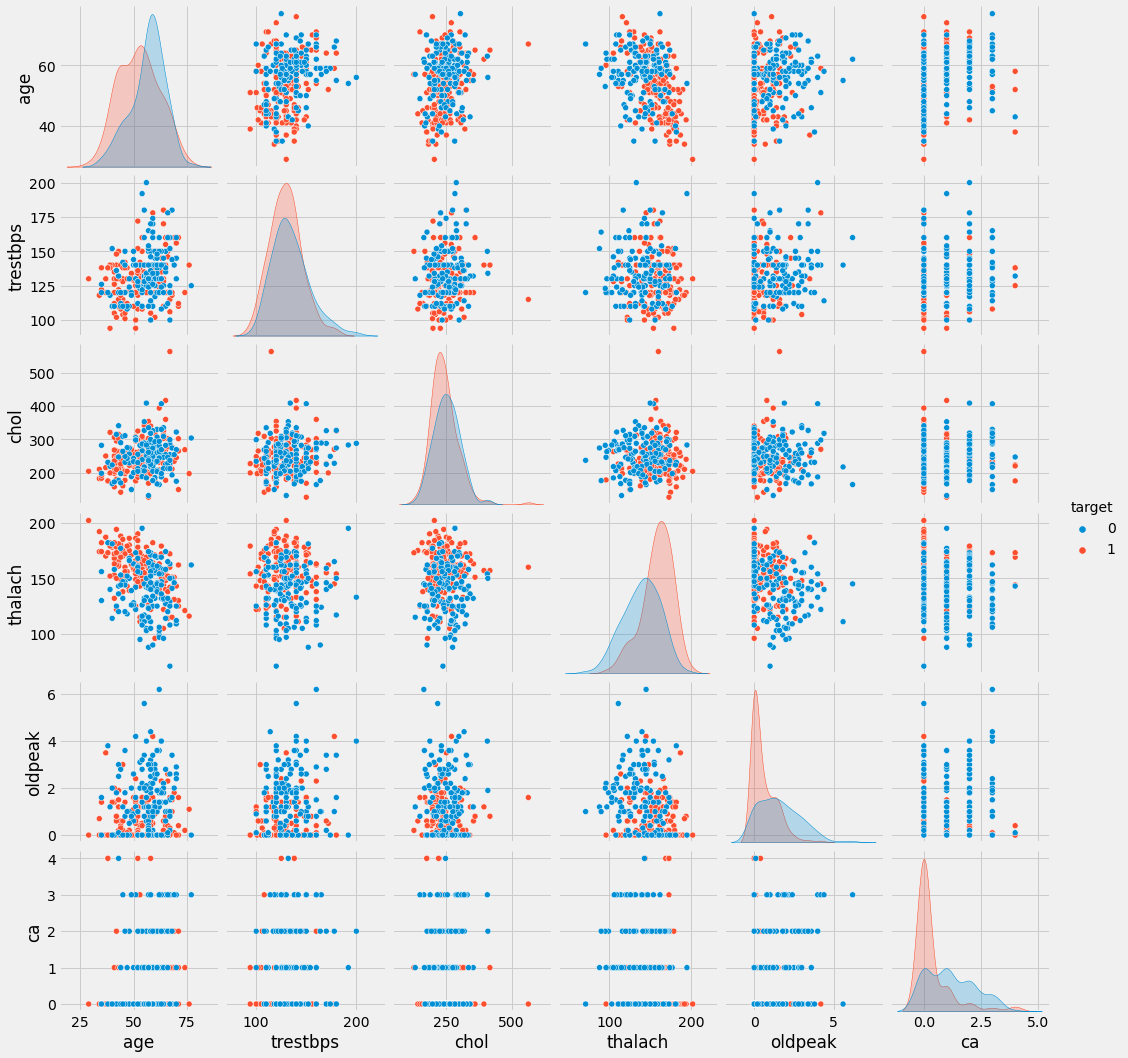

In [8]:
sns.pairplot(pd.concat([data[cols], data["target"]], axis=1), hue="target")
plt.show()

## Heart Disease Analysis by Gender

I suggest [this notebook](https://www.kaggle.com/asimislam/tutorial-python-subplots) if you need help with subplots. The code cell below had gotten from it. Luckily, it's the same dataset.

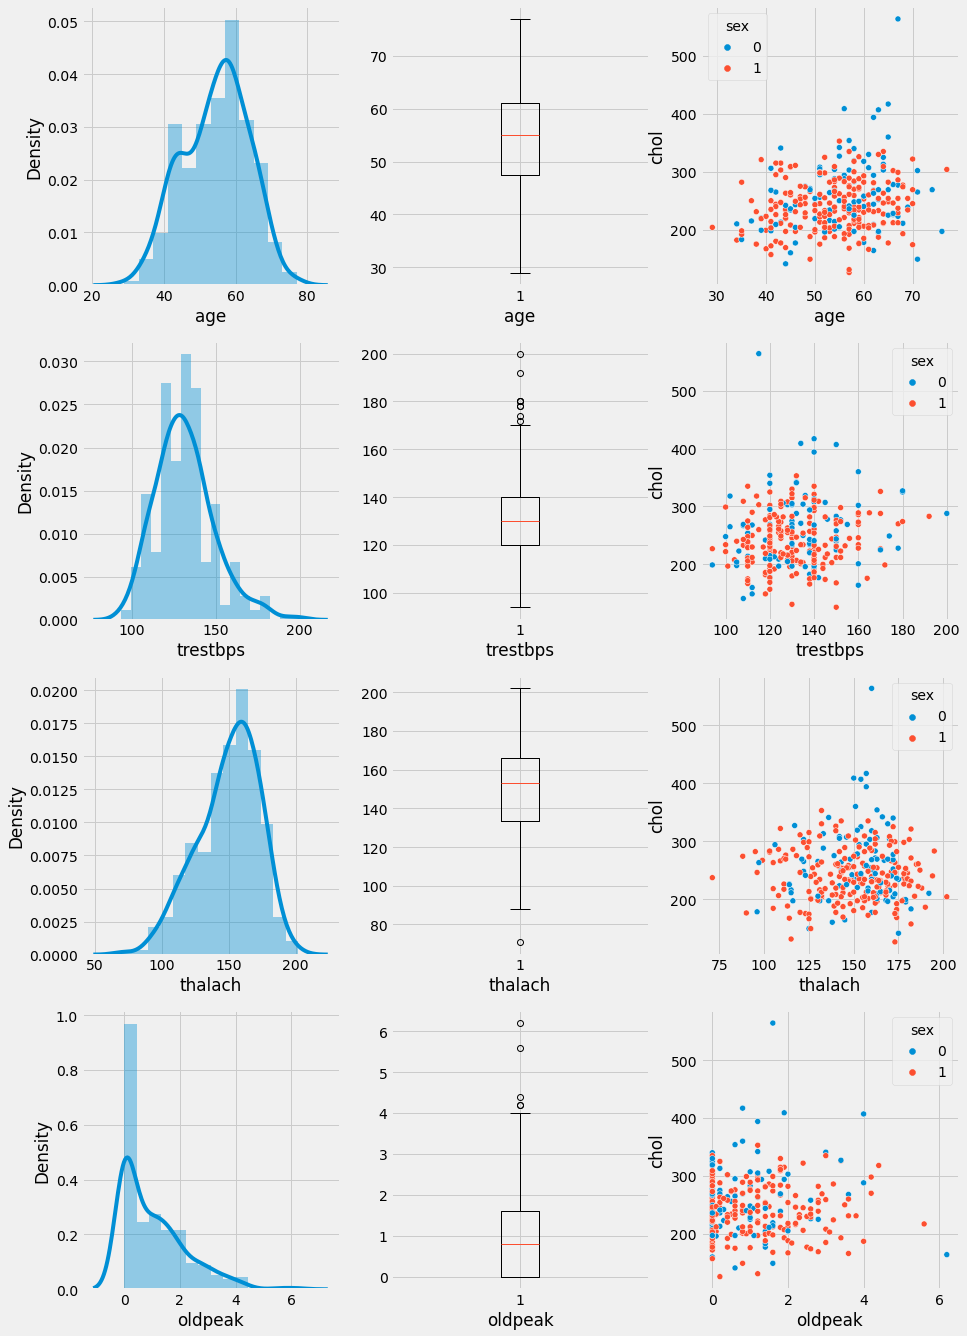

In [9]:
heart_NUM = ['age', 'trestbps', 'thalach', 'oldpeak']

#  plot Numerical Data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in heart_NUM:
    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.distplot(data[i])
    c = c+1

    plt.subplot(a,b,c)
    plt.xlabel(i)
    plt.boxplot(x=data[i])
    c = c+1

    plt.subplot(a,b,c)
    plt.xlabel(i)
    sns.scatterplot(data=data, x=i, y='chol', hue='sex')
    c = c+1

plt.show()

In [10]:
f = data[data["sex"] == 0] #female
m = data[data["sex"] == 1] #male

f_p = f[f["target"] == 1] #female with heart disease
f_np = f[f["target"] == 0] 

m_p = m[m["target"] == 1] #male with heart disease
m_np = m[m["target"] == 0]

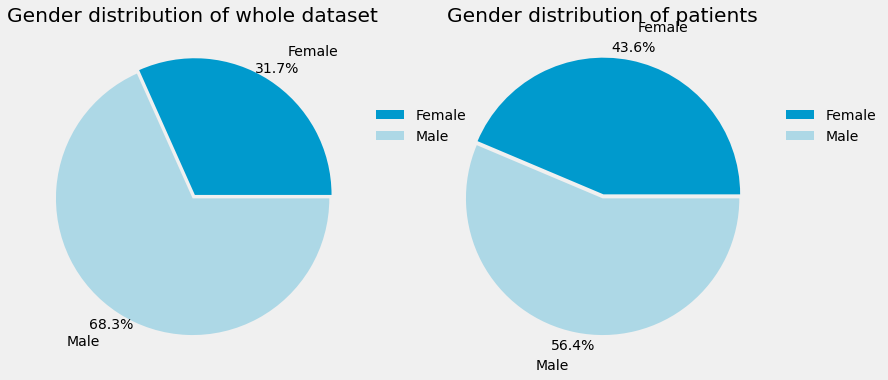

In [11]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(x=[len(f),len(m)], labels=["Female","Male"], colors=['#009ACD', '#ADD8E6'], autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.03,0))
plt.title("Gender distribution of whole dataset")
plt.legend(frameon=False, bbox_to_anchor=(1,0.8))

plt.subplot(122)
plt.pie(x=[len(f_p),len(m_p)], labels=["Female","Male"], colors=['#009ACD', '#ADD8E6'], autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.03,0))
plt.title("Gender distribution of patients")
plt.legend(frameon=False, bbox_to_anchor=(1,0.8))
plt.show()

56,4% of people having heart disease is male, but keep in mind that the dataset has more male entries than it has for females. So, how many patients are there in male and female observations?

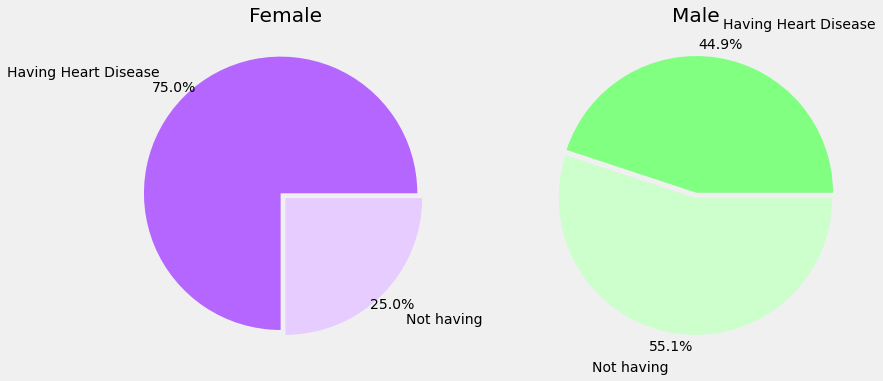

In [12]:
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.pie(x=[len(f_p),len(f_np)], labels=["Having Heart Disease","Not having"], colors=['#b566ff', '#e6ccff'], autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.05,0))
plt.title("Female")

plt.subplot(122)
plt.pie(x=[len(m_p),len(m_np)], labels=["Having Heart Disease", "Not having"], colors=['#80ff80', '#ccffcc'], autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.04,0))
plt.title("Male")

plt.show()

## Correlation Matrix

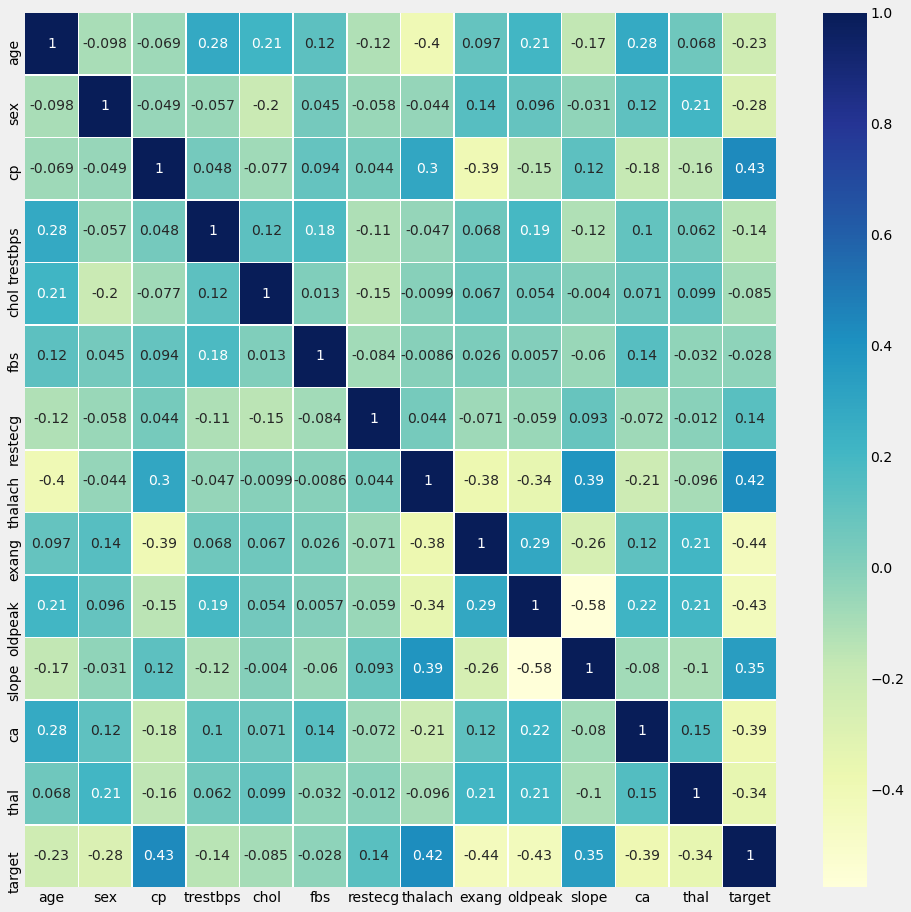

In [13]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

# Model

I want to use 3 classification methods and compare their scores. The models:
- SVC
- Random Forest Classifier
- Gradient Boosting Classifier

Since, labels are imbalance in dataset StratifiedKFold will be used to get better predictions and reduce overfit/underfit risks.

Also, feature values have different ranges than each other I will scale data.

To compare model results accuracy_score and confusion_matrix will help us.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
X = data.drop("target", axis=1).values
y = data["target"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

models = [SVC(), RandomForestClassifier(), GradientBoostingClassifier()]

In [16]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    acc = []
    cm = []
    for model in models:        
        model.fit(X_train_fold, y_train_fold)
        pred =  model.predict(X_test_fold)
        acc.append(accuracy_score(y_test_fold, pred))
        cm.append(confusion_matrix(y_test_fold, pred))

In [17]:
score = {"model": ["SVC","RandomForestClassifier","GradientBoostingClassifier"], "accuracy ": acc}
result = pd.DataFrame(score)
result

,model,accuracy
0,SVC,0.900000
1,RandomForestClassifier,0.900000
2,GradientBoostingClassifier,0.883333


## Confusion Matrices

![](https://miro.medium.com/max/445/1*Z54JgbS4DUwWSknhDCvNTQ.png)

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[9] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature.[10] The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

1. [Image](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
2. [Definiton](https://en.wikipedia.org/wiki/Confusion_matrix)

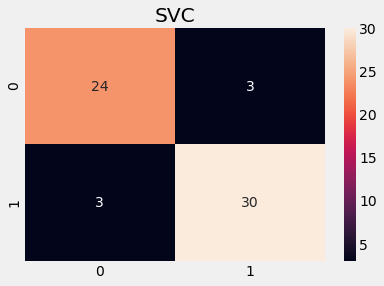

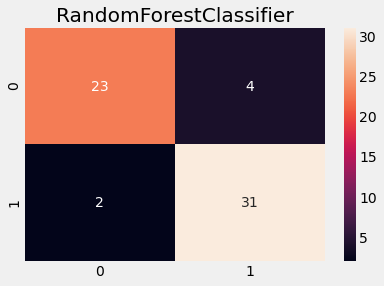

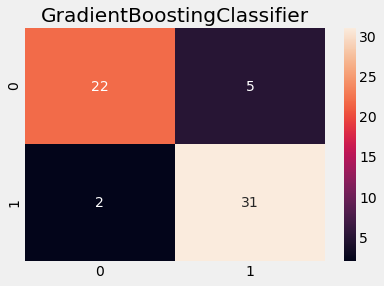

In [18]:
for i,model in enumerate(["SVC","RandomForestClassifier","GradientBoostingClassifier"]):
    sns.heatmap(cm[i], annot=True)
    plt.title(model)
    plt.show()